# 2017 - 2022 HDB Resale Flat Prices Analysis

## Contents

* [Introduction](#introduction)
* [Exploratory Data Analysis](#eda)
* [Linear Regression](#lr)
* [Conclusion](#conclusion)

## Introduction <a id="introduction"></a>

Over the past decade, HDB resale flat prices have been increasing across the country. A reason for this observation was the surge of demand in larger HDB flats. Another possible reason could be the location of the HDB flat which inflated the flat price. 

In this project, I will perform an exploratory data analysis and linear regression modelling on data provided by [Data.gov](https://data.gov.sg/dataset/resale-flat-prices?resource_id=f1765b54-a209-4718-8d38-a39237f502b3) on the HDB resale flat prices from January 2017 - November 2022. 

## Exploratory Data Analysis <a id="eda"></a>

In this section, I will analyse and visualise data with these set of questions:

<ol>    
    <li>What is the trend of the number of resale HDB flats sold?</li>
    <li>Distribution and correlation of the factors</li>
    <li>What is the trend of the HDB prices?</li>
    <li>Which town/region is more likely to obtain the highest resale price?</li>
    <li>Based on the flat type, what is the trend of the price as time progresses?</li>
    <li>If the lease commencement date is older, will the price be higher?</li>
</ol>

In [1]:
# Import all the packages to be used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

## Data Information

The data set is very clean with a total of 141176 entries and 11 columns. There are no missing values in the data set.

In [2]:
# Load file and observe the first 5 lines
df = pd.read_csv("HDB_Resale_Prices.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
# View the overall information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141176 entries, 0 to 141175
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                141176 non-null  object 
 1   town                 141176 non-null  object 
 2   flat_type            141176 non-null  object 
 3   block                141176 non-null  object 
 4   street_name          141176 non-null  object 
 5   storey_range         141176 non-null  object 
 6   floor_area_sqm       141176 non-null  float64
 7   flat_model           141176 non-null  object 
 8   lease_commence_date  141176 non-null  int64  
 9   remaining_lease      141176 non-null  object 
 10  resale_price         141176 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.8+ MB


In [4]:
# Check for missing values for each column
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Data Cleaning

To perform an analysis, I will be removing columns which are unrelated to the scope of the project.

In [5]:
# Create a new column with just the year only 
df['Year'] = pd.to_datetime(df["month"], format='%Y-%m-%d')
df['Year'] = df['Year'].dt.strftime('%Y')

# Create a new column with the HDB flat age with reference to the year 2023
df["age"] = 2023 - df["lease_commence_date"]

In [6]:
# Drop unrelated columns
df.drop(["month", "block", "street_name", "storey_range", "remaining_lease", "lease_commence_date", "flat_model"], axis=1, inplace=True)

In [7]:
# Descriptive statistics
df.describe()

,floor_area_sqm,resale_price,age
count,141176.000000,1.411760e+05,141176.000000
mean,97.715299,4.752946e+05,27.561101
std,24.086342,1.647471e+05,13.669670
min,31.000000,1.400000e+05,4.000000
25%,82.000000,3.550000e+05,17.000000
50%,94.000000,4.450000e+05,27.000000
75%,113.000000,5.600000e+05,38.000000
max,249.000000,1.418000e+06,57.000000


### 1. Number of HDB 
What is the trend of the number of resale HDB flats sold?
<br>
<br>
<b>Findings:</b> From Graph 1, we can observe that there has been an increasing trend for the number of HDB resale flats being sold from 2017 to 2022. 
The year 2021 has the highest number of HDB resale flats compared to the rest.

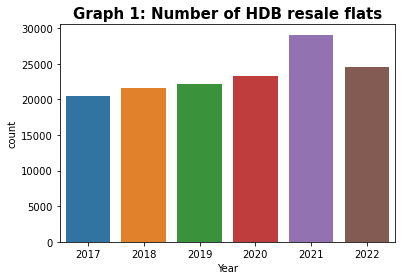

In [8]:
# Number of HDB resale flats in each year
sns.countplot(x=df["Year"])
plt.title("Graph 1: Number of HDB resale flats", fontsize=15, fontweight="bold")
plt.show()

In [9]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

### 2. Distribution and correlation of factors 

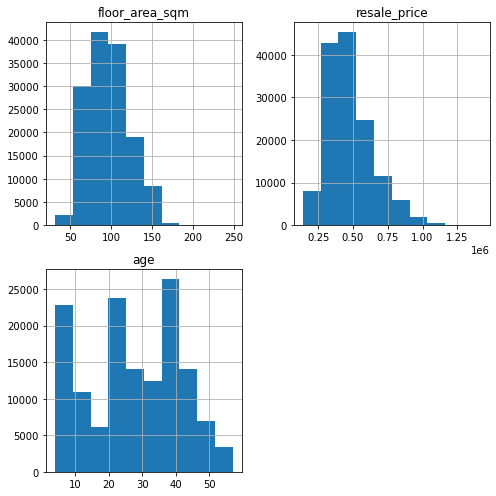

In [10]:
# Distribution
df.hist(figsize=(7,7))
plt.tight_layout()

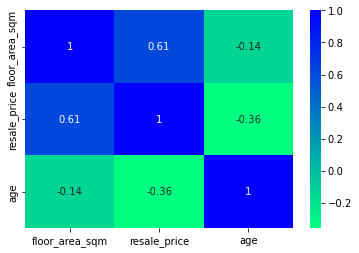

In [11]:
# Heatmap to see the correlation
sns.heatmap(df.corr(), annot = True, cmap="winter_r")
plt.show()

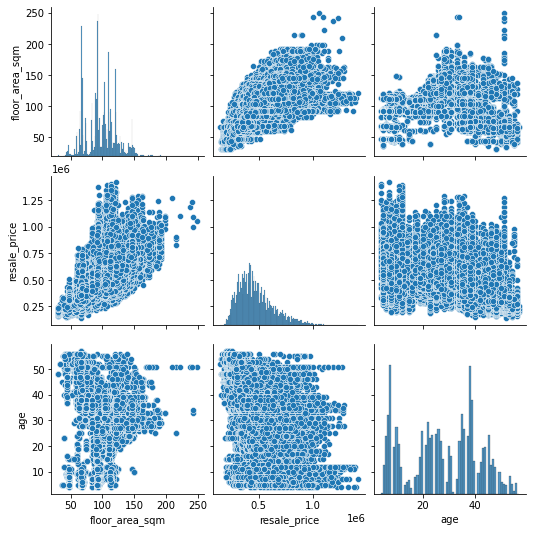

In [12]:
sns.pairplot(df)
plt.show()

### 3. Trend of HDB price
What is the trend of the HDB prices?
<br>
<b>Findings:</b> From graph 2, it shows that the price decreases from 2017 to 2019 before it increases from 2019 to 2022. The rate of increase in the price seems to be higher than the rate of decrease. 

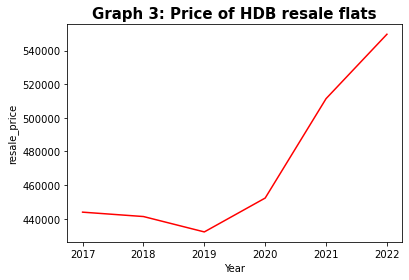

In [13]:
# Plot a line graph for resale_price against Year
sns.lineplot(x="Year", y="resale_price", data=df, color="red", ci=None)
plt.title("Graph 3: Price of HDB resale flats", fontsize=15, fontweight="bold")
plt.show()

### 4. Town
Which town/region is more likely to obtain the highest resale price?
<br>
<b>Findings:</b> The region to obtain the highest resale price is located in the central region throughout the years 2017 - 2022.

In [14]:
# Create a function to get the town with the highest resale price for each year
def town_year(selected_year):
    # Create a new dataframe which corresponds to only the selected year
    df_year = df[df["Year"] == str(selected_year)]
    
    # Find out the max resale price for the selected year
    current_df = df_year.groupby("town")["resale_price"].max()
    price_year = current_df.max()
    
    # Find the town with the highest resale price for the selected year
    town_result = df_year[df_year["resale_price"] == price_year]["town"]
    return town_result

In [15]:
# Create a for loop for the year 2017 - 2023 to find the towns
for year in range(2017, 2023):
    town_result = town_year(year)
    print("The town with the highest resale price in " + str(year) + " is " + str(town_result.values).strip("[]"))

The town with the highest resale price in 2017 is 'BISHAN'
The town with the highest resale price in 2018 is 'KALLANG/WHAMPOA'
The town with the highest resale price in 2019 is 'KALLANG/WHAMPOA'
The town with the highest resale price in 2020 is 'CENTRAL AREA'
The town with the highest resale price in 2021 is 'BISHAN'
The town with the highest resale price in 2022 is 'QUEENSTOWN'


### 5. Flat Type
Based on the various flat types, what is the trend of the price?
<br>
<b>Findings:</b> From 2017 to 2019, the general HDB resale prices decreases as illustrated in graph 2. However only the Multi-generation flat type showed an opposite trend which the HDB resale prices for this type of flats actually increases from 2017 to 2019. Additionally, the increase in resale prices tend to be more in bigger flats such as 5 Room, Executive, Multi-generation compared to smaller flats.

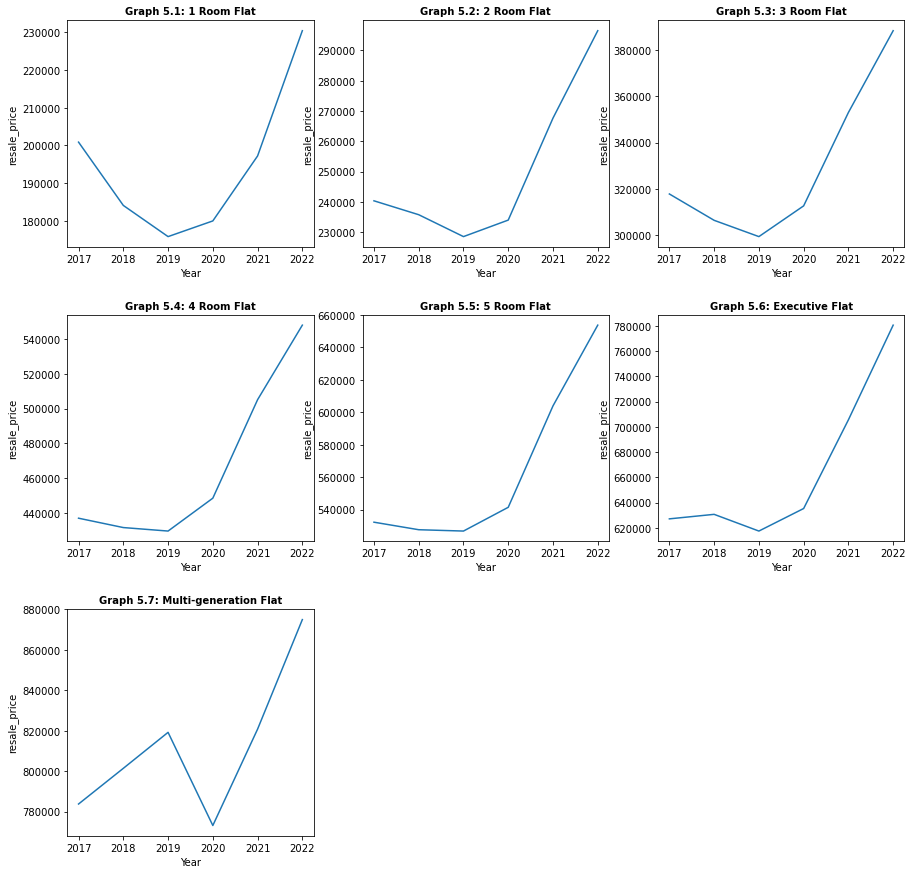

In [16]:
# Presenting the respective graphs in subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 1 ROOM flat
df_1rm = df[df["flat_type"] == "1 ROOM"]
sns.lineplot(x="Year", y="resale_price",data=df_1rm, ci=None, ax=axs[0, 0])
axs[0, 0].set_title("Graph 5.1: 1 Room Flat", fontsize=10, fontweight="bold")

# 2 ROOM flat
df_2rm = df[df["flat_type"] == "2 ROOM"]
sns.lineplot(x="Year", y="resale_price",data=df_2rm, ci=None, ax=axs[0, 1])
axs[0, 1].set_title("Graph 5.2: 2 Room Flat", fontsize=10, fontweight="bold")

# 3 ROOM flat
df_3rm = df[df["flat_type"] == "3 ROOM"]
sns.lineplot(x="Year", y="resale_price",data=df_3rm, ci=None, ax=axs[0, 2])
axs[0, 2].set_title("Graph 5.3: 3 Room Flat", fontsize=10, fontweight="bold")

# 4 ROOM flat
df_4rm = df[df["flat_type"] == "4 ROOM"]
sns.lineplot(x="Year", y="resale_price",data=df_4rm, ci=None, ax=axs[1, 0])
axs[1, 0].set_title("Graph 5.4: 4 Room Flat", fontsize=10, fontweight="bold")

# 5 ROOM flat
df_5rm = df[df["flat_type"] == "5 ROOM"]
sns.lineplot(x="Year", y="resale_price",data=df_5rm, ci=None, ax=axs[1, 1])
axs[1, 1].set_title("Graph 5.5: 5 Room Flat", fontsize=10, fontweight="bold")

# Executive flat
df_exe = df[df["flat_type"] == "EXECUTIVE"]
sns.lineplot(x="Year", y="resale_price",data=df_exe, ci=None, ax=axs[1, 2])
axs[1, 2].set_title("Graph 5.6: Executive Flat", fontsize=10, fontweight="bold")

# Multi-genereation flat
df_mg = df[df["flat_type"] == "MULTI-GENERATION"]
sns.lineplot(x="Year", y="resale_price",data=df_mg, ci=None, ax=axs[2, 0])
axs[2, 0].set_title("Graph 5.7: Multi-generation Flat", fontsize=10, fontweight="bold")

# Hide unused subplots
for col in range(1,3):
    axs[2, col].axis("off")

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()

### 6. Age
If the age of the HDB is older, will the price be higher?
<br>
<b>Findings:</b> From graph 6, it shows a trend that older HDB would generally fetch a lower price.

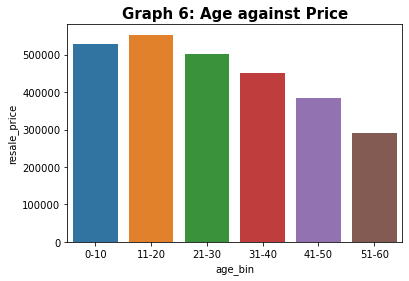

In [17]:
# Create bins for age 
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60"]
df["age_bin"] = pd.cut(df["age"], bins=bins, labels=labels)

# Plot a barplot for the age bins
sns.barplot(x="age_bin", y="resale_price",data=df, ci=None)
plt.title("Graph 6: Age against Price", fontsize=15,fontweight="bold")
plt.show()

## Linear Regression Model 1<a id="lr"></a>

<ol>
    <li>Create dummy variables for categorical variables</li>
    <li>Transformation of variables</li>
    <li>Preparing the data for linear regression modelling</li>
    <li>Fitting the Linear Regression Model</li>
    <li>Evaluation of the trained model</li>
    <li>Check assumptions of linear regression</li>
</ol>

### 1. Creating dummy variables

In [18]:
# Create dummy variables for flat_type, using "1 ROOM" as a reference category
dummies = pd.get_dummies(df["flat_type"], drop_first=True)
new_df = pd.concat([df, dummies], axis=1)

### 2. Transformation of variables
<ul>
    <li>If skewness is less than -1 or greater than 1, the distribution is highly skewed.</li>
    <li>If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.</li>
    <li>If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.</li>
</ul>

In [19]:
# Remove warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
# Check for the skewness of each variable, ignoring the dummy variables
new_df.skew()

floor_area_sqm       0.261409
resale_price         0.988181
Year                -0.146394
age                 -0.073456
2 ROOM               7.965701
3 ROOM               1.257393
4 ROOM               0.335475
5 ROOM               1.127172
EXECUTIVE            3.137886
MULTI-GENERATION    44.558243
dtype: float64

In [21]:
# Since resale_price is positively skewed and the skewness value is not within -0.5 and 0.5, I would transform the variable to
# make it more normally distributed

new_df['resale_price'] = np.log(new_df['resale_price'])

In [22]:
# Check the new skewness value

new_df.skew()

floor_area_sqm       0.261409
resale_price         0.133256
Year                -0.146394
age                 -0.073456
2 ROOM               7.965701
3 ROOM               1.257393
4 ROOM               0.335475
5 ROOM               1.127172
EXECUTIVE            3.137886
MULTI-GENERATION    44.558243
dtype: float64

### 3. Preparing the data 

In [23]:
# Drop columns that are not used in the linear regression
df_prepared = new_df.drop(["town", "flat_type", "Year", "age_bin"], axis="columns")

In [24]:
# Creating X (predictor/Independent variables) and y (target/Dependent variable) separately
X = df_prepared[["floor_area_sqm", "age", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]]
y = df_prepared['resale_price']

# Test dataset (20%), while Train dataset (80%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# To see number of observations
print(X_train.shape)
print(y_train.shape)

(112940, 8)
(112940,)


### 4. Fitting the Linear Regression Model

In [25]:
# Creation of a LinearRegression object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Calling the fit() function of the `LinearRegression` class, the fit() function fits (creates) the linear model
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# Intercept of linear regression equation
c = round(lm.intercept_, 3)
print(c)

12.347


In [27]:
# Coefficient for the independent variables
lm.coef_

# Display the coefficients in DataFrame
df_lm = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients']).round(3)
df_lm

,Coefficients
floor_area_sqm,0.006
age,-0.007
2 ROOM,-0.004
3 ROOM,0.228
4 ROOM,0.330
5 ROOM,0.398
EXECUTIVE,0.464
MULTI-GENERATION,0.641


### Linear Regression Equation

<b>`y_pred(Price) = 12.347 + 0.006(floor_area_sqm) - 0.007(age) -0.004(2 ROOM) + 0.228(3 ROOM) + 0.330(4 ROOM) + 0.398(5 ROOM) + 0.464(EXECUTIVE) + 0.641(MULTI-GENERATION)`<b>

### 5. Evaluating the Linear Regression Model
<b>Findings:</b>
<ol>
    <li>
        R-squared
        <ul>
            <li>An R-squared value of 0.552 indicates that this linear regression model explains 55.2% of the variability in the dependent variable.</li>
        </ul>
    </li>
    <li>
        Significance of the independent variables
        <ul>
            <li>By referencing the "P > |t|" value, all variables except "2 ROOM" are significant at 5% significant level.</li>
        </ul>
    </li>
    <li>
        Model signficance
        <ul>
            <li>By referencing the "Prob(F-statistic)" value, this linear regression model is signficant at 5% significant level.</li>
        </ul>
    </li>
    
</ol>

In [28]:
# Find the Ordinary Least Sqaures (OLS)
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)

# To fit the model
model_results = model.fit()

# To get the full summary
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:19:34   Log-Likelihood:                 9017.0
No. Observations:              112940   AIC:                        -1.802e+04
Df Residuals:                  112931   BIC:                        -1.793e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.3468      0.033    376.815      0.000      12.283      12.411
floor_area_sqm       0.0055    9.3e-05     59.137      0.000       0.005       0.006
age                 -0.0072   5.48e-05   -131.573      0.000      -0.007      -0.007
2 ROOM              -0.0044      0.033     -0.133      0.894      -0.069       0.060
3 ROOM               0.2282      0.033      6.954      0.000       0.164       0.293
4 ROOM               0.3297      0.033      9.924      0.000       0.265       0.395
5 ROOM               0.3985      0.034     11.825      0.000       0.332       0.465
EXECUTIVE            0.4640      0.034     13.474      0.000       0.396       0.531
MULTI-GENERATION     0.6407      0.045     14.268      0.000       0.553       0.729
==============================================================================
Omnibus:                     6114.270   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7152.121
Skew:                           0.611   Prob(JB):                         0.00
Kurtosis:                       3.166   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6. Check the assumptions of linear regression
<ol>
    <li>The mean of y is linearly related to X</li>
    <li>Errors have equal variance</li>
    <li>Errors are normally distributed</li>
    <li>Errors are independent</li>
</ol>

#### 6.1 Mean of y is linearly related to X
<b>Findings:</b> The variables floor_area_sqm and age seems to be linearly related to X, which satisfies this assumption.

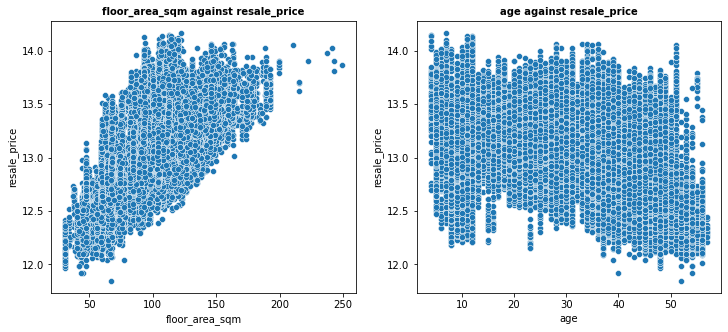

In [29]:
# Presenting the respective graphs in subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# floor_area_sqm against resale_price
sns.scatterplot(x="floor_area_sqm", y="resale_price",data=df_prepared, ax=axs[0])
axs[0].set_title("floor_area_sqm against resale_price", fontsize=10, fontweight="bold")

# age against resale_price
sns.scatterplot(x="age", y="resale_price",data=df_prepared, ax=axs[1])
axs[1].set_title("age against resale_price", fontsize=10, fontweight="bold")

plt.show()

#### 6.2 Errors have equal variance
<b>Findings:</b> The residuals on the residual graph seems random and spread of the residuals looks roughly constant. Hence, the errors have equal variance which satisfies this assumption.

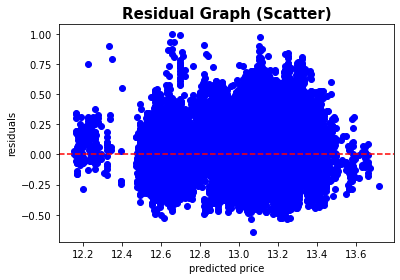

In [30]:
# Get the predicted dataset
y_pred = lm.predict(X_test)

# Create a new DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a new column for residuals and calculate the residual value
results['residuals'] = results['Actual'] - results['Predicted']

# Draw a scatter diagram to check
plt.scatter(results['Predicted'], results['residuals'],  color='blue')
plt.axhline(y=0, color="red", ls="--")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.title("Residual Graph (Scatter)", fontsize=15, fontweight="bold")
plt.show()

#### 6.3 Errors are normally distributed
<b>Findings:</b> The histogram looks normally distributed, thus the errors are normally distributed which satisfies this assumption.

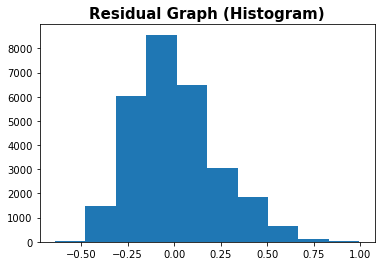

In [31]:
# Draw histogram to check 
plt.hist(results['residuals'])
plt.title("Residual Graph (Histogram)", fontsize=15, fontweight="bold")
plt.show()

#### 6.4 Errors are independent
<b>Findings:</b> The Variance Inflation Factor (VIF) for most variables are high which indicates multicollinearity and this violates the assumption that errors are independent. 

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# Add a column of constant of value 1
X_train1 = sm.add_constant(X_train)
# for loop to obtain the VIF values for each independent variables
# X_train1.shape[1] refers to the number of columns
print(X_train1.shape[1])

9


In [33]:
# for loop to obtain the VIF values for each independent variables
for i in range(X_train1.shape[1]):
    v = vif(X_train1.values, i)
    if i == 0:
        print("VIF for intercept :", v)
    else:
        print("VIF for {} :{}".format(X_train1.columns[i],round(v,4)))

VIF for intercept : 2429.338229318919
VIF for floor_area_sqm :11.387
VIF for age :1.2649
VIF for 2 ROOM :36.7812
VIF for 3 ROOM :436.6328
VIF for 4 ROOM :607.761
VIF for 5 ROOM :485.9743
VIF for EXECUTIVE :194.8423
VIF for MULTI-GENERATION :2.5036


## Linear Regression Model 2

<h4>Since the VIF for "4 ROOM" is the highest, I would drop this variable and run a 2nd linear regression model on the other variables.</h4>

<ol>
    <li>Drop the highest VIF variable</li>
    <li>Fitting the linear regression</li>
    <li>Evaluation of the trained model</li>
    <li>Check assumptions of linear regression</li>
    <li>Evaluate model against test dataset</li>
</ol>

### 1. Drop "4 ROOM" variable

In [34]:
df_prepared2 = df_prepared.drop("4 ROOM", axis="columns")
df_prepared2.head()

,floor_area_sqm,resale_price,age,2 ROOM,3 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION
0,44.0,12.354493,44,1,0,0,0,0
1,67.0,12.429216,45,0,1,0,0,0
2,67.0,12.476100,43,0,1,0,0,0
3,68.0,12.487485,43,0,1,0,0,0
4,67.0,12.487485,43,0,1,0,0,0


### 2. Fitting the linear regression

In [35]:
# Creating X2 (predictor/Independent variables) and y2 (target/Dependent variable) separately
X2 = df_prepared2[["floor_area_sqm", "age", "2 ROOM", "3 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]]
y2 = df_prepared2['resale_price']

# Test dataset (20%), while Train dataset (80%)
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 101)

# To see number of observations
print(X2_train.shape)
print(y2_train.shape)

(112940, 7)
(112940,)


In [36]:
from sklearn.linear_model import LinearRegression

# Creation of a LinearRegression object
lm2 = LinearRegression()

# Calling the fit() function of the `LinearRegression` class, the fit() function fits (creates) the linear model
lm2.fit(X2_train, y2_train)

LinearRegression()

In [37]:
c2 = lm2.intercept_
print(round(c2, 3))

12.661


In [38]:
# Coefficient for the independent variables
lm2.coef_

# Display the coefficients in DataFrame
df_lm2 = pd.DataFrame(lm2.coef_,X2.columns, columns=['Coefficients']).round(3)
df_lm2

,Coefficients
floor_area_sqm,0.006
age,-0.007
2 ROOM,-0.325
3 ROOM,-0.096
5 ROOM,0.065
EXECUTIVE,0.126
MULTI-GENERATION,0.300


### Linear Regression Equation 2

<b>`y2_pred(Price) = 12.661 + 0.006(floor_area_sqm) - 0.007(age) -0.325(2 ROOM) - 0.096(3 ROOM) + 0.065(5 ROOM) + 0.126(EXECUTIVE) + 0.300(MULTI-GENERATION)`<b>

### 3. Evaluation of the trained model
<b>Findings:</b>
<ol>
    <li>
        R-squared
        <ul>
            <li>An R-squared value of 0.551 indicates that this linear regression model explains 55.1% of the variability in the dependent variable.</li>
        </ul>
    </li>
    <li>
        Significance of the independent variables
        <ul>
            <li>By referencing the "P > |t|" value, all variables are significant at 5% significant level.</li>
        </ul>
    </li>
    <li>
        Model signficance
        <ul>
            <li>By referencing the "Prob(F-statistic)" value, this linear regression model is signficant at 5% significant level.</li>
        </ul>
    </li>
    
</ol>

In [39]:
# Find the Ordinary Least Sqaures (OLS)
import statsmodels.api as sm
x2_train = sm.add_constant(X2_train)
model2 = sm.OLS(y2_train, x2_train)

# To fit the model
model2_results = model2.fit()

# To get the full summary
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                 1.981e+04
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:19:39   Log-Likelihood:                 8967.8
No. Observations:              112940   AIC:                        -1.792e+04
Df Residuals:                  112932   BIC:                        -1.784e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.6607      0.009   1480.660      0.000      12.644      12.677
floor_area_sqm       0.0057   9.14e-05     62.103      0.000       0.005       0.006
age                 -0.0072   5.46e-05   -132.780      0.000      -0.007      -0.007
2 ROOM              -0.3252      0.007    -45.728      0.000      -0.339      -0.311
3 ROOM              -0.0959      0.003    -29.910      0.000      -0.102      -0.090
5 ROOM               0.0651      0.003     24.452      0.000       0.060       0.070
EXECUTIVE            0.1261      0.005     24.358      0.000       0.116       0.136
MULTI-GENERATION     0.3004      0.029     10.358      0.000       0.244       0.357
==============================================================================
Omnibus:                     6100.437   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7133.747
Skew:                           0.610   Prob(JB):                         0.00
Kurtosis:                       3.163   Cond. No.                     4.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4. Check the assumptions of linear regression
<ol>
    <li>The mean of y is linearly related to X</li>
    <li>Errors have equal variance</li>
    <li>Errors are normally distributed</li>
    <li>Errors are independent</li>
</ol>

#### 4.1 Mean of y is linearly related to X
<b>Findings:</b> The variables floor_area_sqm and age seems to be linearly related to X, which satisfies this assumption.

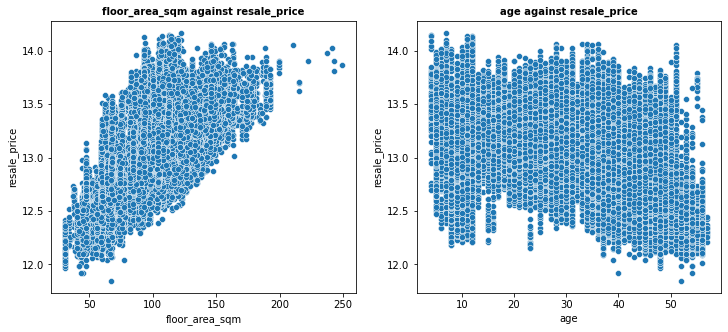

In [40]:
# Presenting the respective graphs in subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# floor_area_sqm against resale_price
sns.scatterplot(x="floor_area_sqm", y="resale_price",data=df_prepared, ax=axs[0])
axs[0].set_title("floor_area_sqm against resale_price", fontsize=10, fontweight="bold")

# age against resale_price
sns.scatterplot(x="age", y="resale_price",data=df_prepared, ax=axs[1])
axs[1].set_title("age against resale_price", fontsize=10, fontweight="bold")

plt.show()

#### 4.2 Errors have equal variance
<b>Findings:</b> The residuals on the residual graph seems random and spread of the residuals looks roughly constant. Hence, the errors have equal variance which satisfies this assumption.

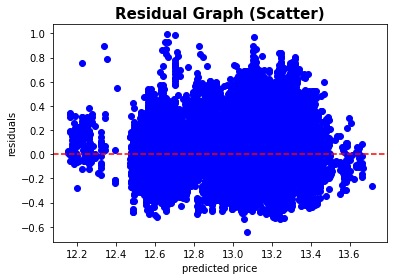

In [41]:
y2_pred = lm2.predict(X2_test)

# Create a new DataFrame
results2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})

# Create a new column for residuals and calculate the residual value
results2['residuals'] = results2['Actual'] - results2['Predicted']

# Draw a scatter diagram to check
plt.scatter(results2['Predicted'], results2['residuals'],  color='blue')
plt.axhline(y=0, color="red", ls="--")
plt.xlabel("predicted price")
plt.ylabel("residuals")
plt.title("Residual Graph (Scatter)", fontsize=15, fontweight="bold")
plt.show()

#### 4.3 Errors are normally distributed
<b>Findings:</b> The histogram looks normally distributed, thus the errors are normally distributed which satisfies this assumption.

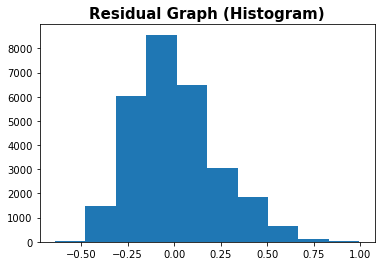

In [42]:
# Draw histogram to check 
plt.hist(results['residuals'])
plt.title("Residual Graph (Histogram)", fontsize=15, fontweight="bold")
plt.show()

#### 4.4 Errors are independent
<b>Findings:</b> The Variance Inflation Factor (VIF) for all the variables are less than 5 which indicates that the variables are moderately correlated. 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X2_train2 = sm.add_constant(X2_train)
X2_train2.shape[1]

for i in range(X2_train2.shape[1]):
    v2 = vif(X2_train2.values, i)
    if i == 0:
        print("VIF for intercept :", v2)
    else:
        print("VIF for {} :{}".format(X2_train2.columns[i],round(v,4)))

VIF for intercept : 165.29733721681043
VIF for floor_area_sqm :2.5036
VIF for age :2.5036
VIF for 2 ROOM :2.5036
VIF for 3 ROOM :2.5036
VIF for 5 ROOM :2.5036
VIF for EXECUTIVE :2.5036
VIF for MULTI-GENERATION :2.5036


### 5. Evaluate Model against test data
<b>Findings:</b> 

<ol>
    <li>
        Scatter Plot
        <ul>
            <li>The graph generally shows an upward trend. However, there are some degree of discrepancy between the predicted and actual values as some points are far from the y=x line.</li>
        </ul>
    </li>
    <li>
        Root Mean Squared Error value
        <ul>
            <li>Based on the Root Mean Squared Error value, the predictions made by the model are off by approximately 0.225 units of the target variable.</li>
        </ul>
    </li>
    <li>
        R-squared value
        <ul>
            <li>Based on the R-squared value, the model is able to explain only about 54.7% of the total variability of the data. level.</li>
        </ul>
    </li>
    
</ol>

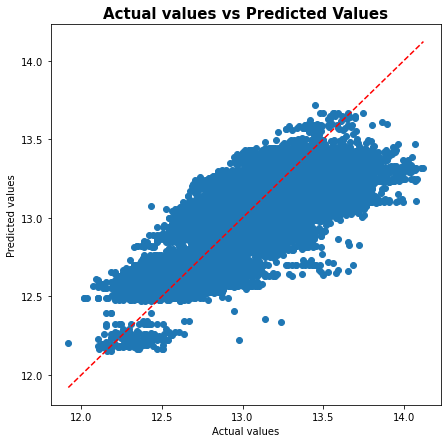

In [44]:
# Get the predicted dataset
y2_pred = lm2.predict(X2_test)

# Draw the scatter plot to see how close the actual(test) and predicted
plt.figure(figsize=(7,7))
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.scatter(y2_test, y2_pred)

# Plot y = x line
plt.plot([min(y2_test), max(y_test)], [min(y2_test), max(y_test)], "--", color="red")
plt.title("Actual values vs Predicted Values", fontsize=15, fontweight="bold")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Quantitative evaluation using RMSE and R-Square
# Mean squared error between actual(test) and predicted
mse = mean_squared_error(y2_test, y2_pred)

# Root mean squared error between actual(test) and predicted
# Value closer to zero means better fit
rmse = round(np.sqrt(mse), 3)
print(rmse)

0.225


In [46]:
# R-Squared value
# Value closer to 1 means the model fit the data better
r_squared = round(r2_score(y_test, y_pred), 3)
print(r_squared)

0.548


### Conclusion <a id="conclusion"></a>

In conclusion, the Exploratory Data Analysis (EDA) and linear regression analysis provide valuable insights into the factors that influence HDB resale prices in Singapore. Through our EDA, I identified several interesting patterns and trends in the data. For example, resale prices tend to be the highest in the central region, resale prices tend to be higher for younger flats, and resale prices tend to increase more for bigger flats.

The linear regression model confirmed the importance of these factors in predicting resale prices. I found that floor area square, age, flat type were all significant predictors of resale price. Specifically, the model predicted that a 10% increase in floor area square was associated with 0.06% increase in resale price, a one-year increase in flat age was associated with 0.7% decrease in resale price, and a flat type which is Multi-generation is predicted to have a resale price that is 0.3 higher than other flat types, holding other variables constant.

Overall, the model has a reasonable level of performance, with an R-squared value of 0.551 and a root mean squared error of 0.225. This suggests that the model explains approximately 55.1% of the variation in resale price, and the model's predictions are accurate within an average range of 0.225.

However, there are limitations to the analysis. For example, the model only considers a limited set of factors that could be important predictors of resale price, such as flat types, age, and floor area square. Other factors, such as condition of flat, and flats located closer to amenities such as MRT stations could also be important predictors.

Despite these limitations, the analysis provides valuable insights into the factors that influence HDB resale prices and could be useful to predict HDB resale prices. Future research could be build upon the analysis by incorporating additional predictors and exploring other factors that may have a relationship with the resale prices.